# lenet5을 활용한 이미지 학습¶
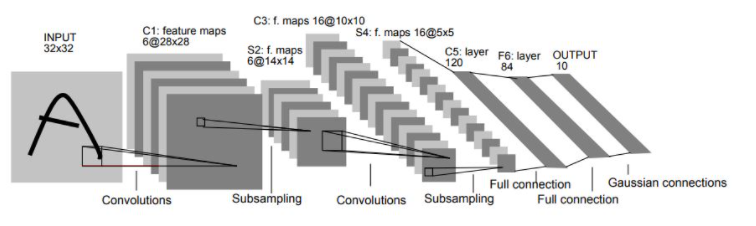
- 위의 모델 구조에 따라서 레이어 구성 
- gray 이미지 데이터인 mnist 사용
- rgb 이미지 데이터인 cifar 사용

## cifar10 활용
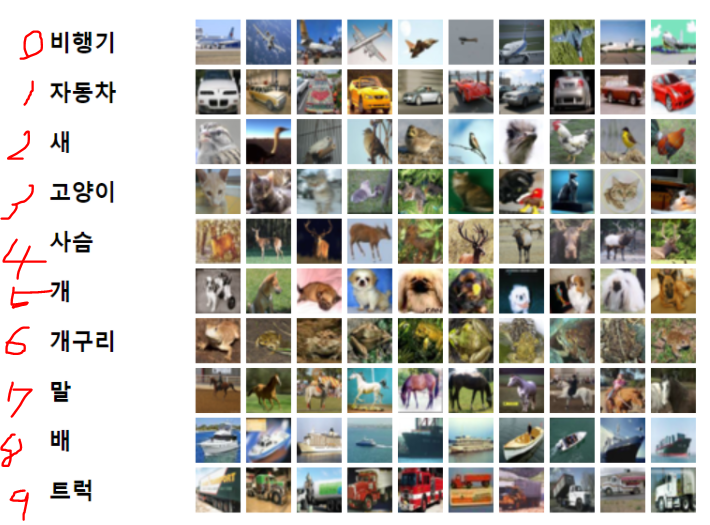

In [1]:
import tensorflow as tf
import pandas as pd

In [19]:
# 데이터를 준비하고
(독립, 종속), _ = tf.keras.datasets.cifar10.load_data()

# numpy array로 변환 (DataFrame 사용시 model.fit(...)에서 에러)
종속 = pd.get_dummies(종속.reshape(50000)).to_numpy() 
print(독립.shape, 종속.shape)
print(type(독립), type(종속))

(50000, 32, 32, 3) (50000, 10)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [22]:
# 모델을 만들고
X = tf.keras.layers.Input(shape=[32, 32, 3])

H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)              

In [23]:
# 모델을 학습하고
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2.0286 - accuracy: 0.3283
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5505 - accuracy: 0.4479
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4590 - accuracy: 0.4861
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4125 - accuracy: 0.5025
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3920 - accuracy: 0.5137
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3740 - accuracy: 0.5230
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3701 - accuracy: 0.5258
Epoch 8/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.3687 - accuracy: 0.5284
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3701 - accuracy: 0.5305
Epoch 10/10
1563/1563 [==============================] - 21s 14m

In [25]:
# 모델을 이용합니다. 
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.00,0.11,0.17,0.06,0.22,0.31,0.13,0.00,0.00
1,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.95
2,0.01,0.00,0.07,0.13,0.07,0.24,0.01,0.46,0.00,0.01
3,0.02,0.00,0.15,0.09,0.30,0.05,0.38,0.01,0.01,0.00
4,0.01,0.45,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.50


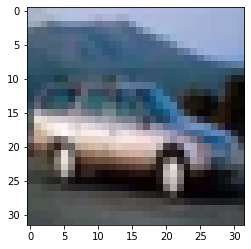

In [29]:
import matplotlib.pyplot as plt
plt.imshow(독립[4])

## mnist 활용
* mnist의 input 이미지 사이즈가 28x28 이기에 Conv2D에서 padding을 해서 28x28으로 유지
* padding을 안하면 filter 사이즈가 5이기에 4가 줄어 24x24가 됨

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
# 데이터를 준비하고
(독립, 종속), _ = tf.keras.datasets.mnist.load_data()

# convolution layer 인풋으로 3D로 요구
독립 = 독립.reshape(60000, 28, 28, 1)
# numpy array로 변환 (DataFrame 사용시 model.fit(...)에서 에러)
종속 = pd.get_dummies(종속).to_numpy() 
print(독립.shape, 종속.shape)
print(type(독립), type(종속))

(60000, 28, 28, 1) (60000, 10)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
# 모델을 만들고
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding="same", activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)              

In [4]:
# 모델을 학습하고
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3086 - accuracy: 0.9353
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0878 - accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0752 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0676 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0661 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0673 - accuracy: 0.9849
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0649 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0699 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0703 - accuracy: 0.9860
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [5]:
# 모델을 이용합니다. 
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


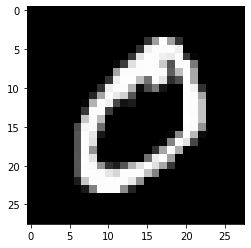

In [9]:
import matplotlib.pyplot as plt
plt.imshow(독립[1], cmap='gray')